# Money Count of a Node Over Iterations

This notebook visualizes the money count of a specific node as a function of simulation iterations.

In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
import numpy as np

## Load or Simulate Money Distribution Data

Load existing simulation data or run a simulation to get the money count for each node at each iteration.

In [2]:
# Run the actual simulation for multiple max_stingy_behaviors values and collect money counts for each node at each iteration

from simulation import TokenSimulation
import parameters as P

num_iterations = P.NUM_ITERATIONS
max_stingy_values = [0, 1, 2, 3, 4, 5]  # You can adjust this range as needed

all_money_histories = {}  # key: max_stingy_behaviors, value: money_history array
node_list = None

for max_stingy in max_stingy_values:
    sim = TokenSimulation(max_stingy_behaviors=max_stingy)
    states, layout, edge_mat = sim.run_simulation(iterations=num_iterations)
    if node_list is None:
        graph0 = states[0][0]
        node_list = [n for n in graph0.nodes]
    money_history = []
    for graph, _ in states:
        money_history.append([graph.nodes[n]["money"] for n in node_list])
    all_money_histories[max_stingy] = np.array(money_history)

Iteration 5: Self-loop added for node(s): AE
Iteration 5: Self-loop added for node(s): AE, AI
Iteration 5: Self-loop added for node(s): AE, AI, AJ
Iteration 5: Self-loop added for node(s): AE, AI, AJ
Iteration 6: Self-loop added for node(s): AA
Iteration 5: Self-loop added for node(s): AE, AI, AJ
Iteration 6: Self-loop added for node(s): AA, AD


## Plot Money Count Over Iterations for Selected Node

Visualize the money count of the selected node as a line graph.

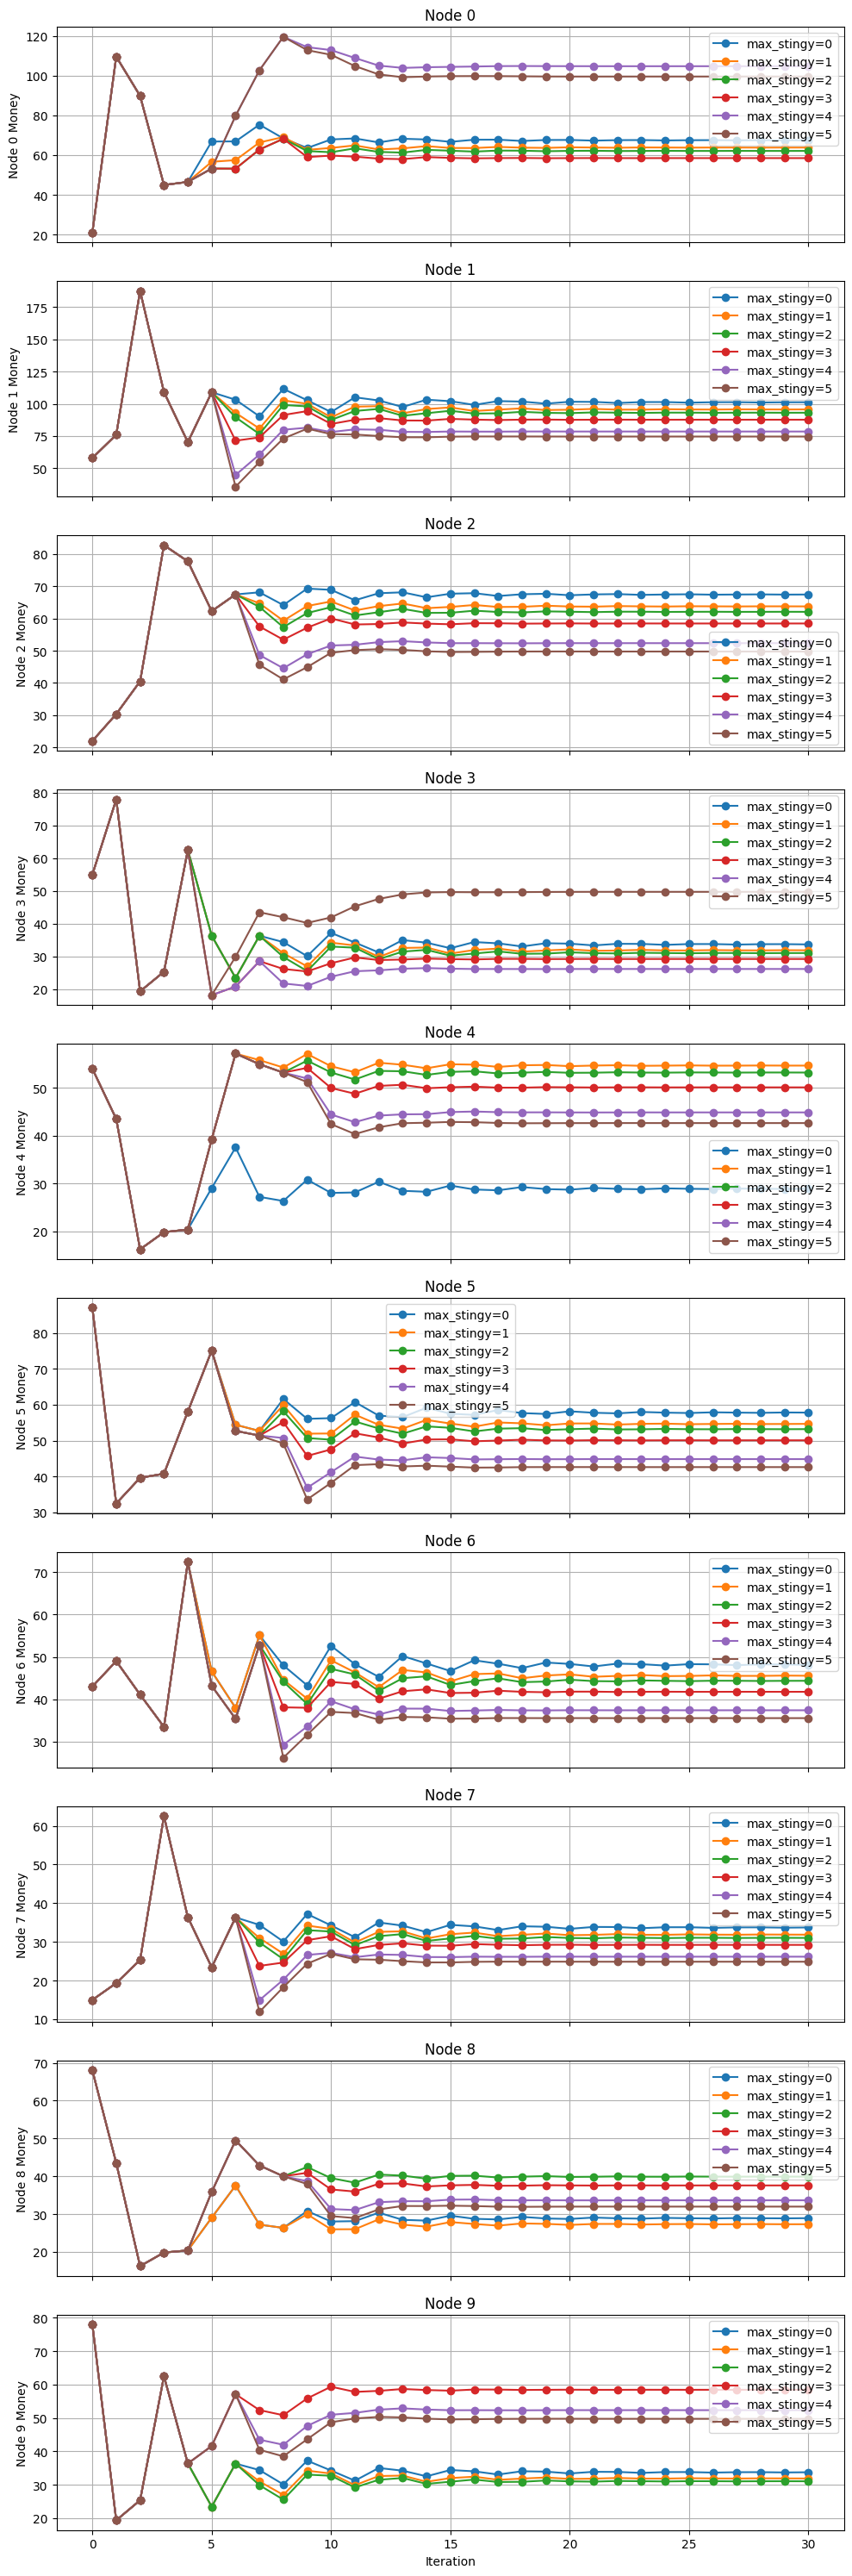

In [3]:
# Plot the money count over iterations for every node in subplots, with a line for each max_stingy_behaviors value
num_nodes = len(node_list)
fig, axes = plt.subplots(num_nodes, 1, figsize=(10, 3*num_nodes), sharex=True)

if num_nodes == 1:
    axes = [axes]  # Ensure axes is always a list

for i in range(num_nodes):
    for max_stingy, money_history in all_money_histories.items():
        axes[i].plot(
            range(money_history.shape[0]),
            money_history[:, i],
            marker='o',
            label=f"max_stingy={max_stingy}"
        )
    axes[i].set_ylabel(f'Node {i} Money')
    axes[i].grid(True)
    axes[i].set_title(f'Node {i}')
    axes[i].legend()

axes[-1].set_xlabel('Iteration')
plt.tight_layout()
plt.show()